In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cf
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import shapefile as shp
import matplotlib.cm as cm
plt.style.use('fivethirtyeight')


In [15]:
#varibility of rainfall for the flood month
data = xr.open_dataset('chirps_21_WA_New.nc')
bono = data.precip.sel(longitude = 2.329, latitude = 7.331, method = 'nearest')
bono_sept = bono.sel(time =slice('2020-06-01', '2020-06-30'))

bono_anon = (bono_sept-np.mean(bono_sept))


C:\Users\Theophilus Bassaw\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Theophilus Bassaw\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


FileNotFoundError: [Errno 2] No such file or directory: 'project/BONO RAINFALL VARIABILITY JUNE 2020.png'

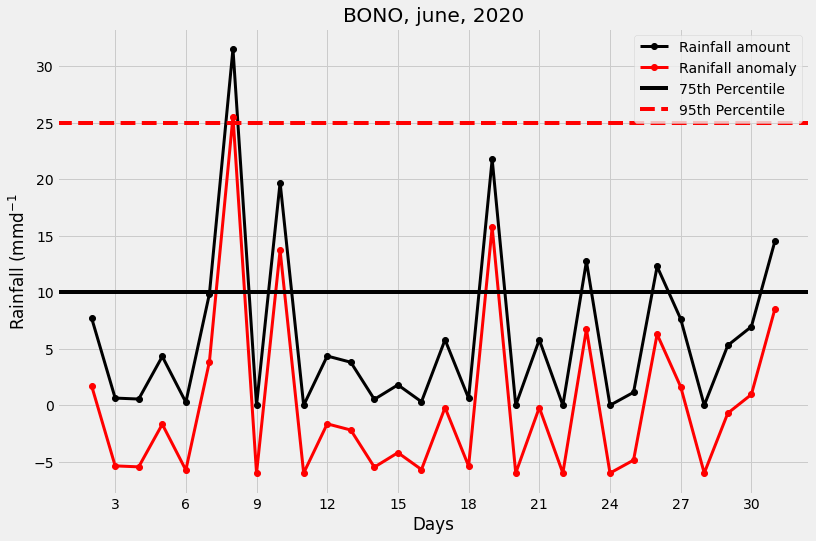

In [16]:

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(bono_sept, color = 'k', linewidth = 3, marker = 'o', label = 'Rainfall amount')
ax.plot(bono_anon, color = 'r', linewidth = 3, marker = 'o', label = 'Ranifall anomaly')
ax.set_ylabel('Rainfall (mmd$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('BONO, june, 2020')
ax.axhline(y = 10, color ='k', label = '75th Percentile' , linestyle = '-')
ax.axhline(y = 25, color ='r', label = '95th Percentile', linestyle = '--')
ax.set_xticks(range(1, 30, 3))
ax.set_xticklabels(['3','6', '9','12', '15', '18', '21','24', '27', '30'])
ax.annotate('*', xy =(7.5, 45),
                                size =40,
                                color = 'b')
ax.annotate('11.30%', xy =(8.5, 48),
                size =15,
                color = 'k')
plt.legend(loc = 1)
#plt.suptitle('BONO RAINFALL VARIABILITY')
fig.savefig('project/BONO RAINFALL VARIABILITY JUNE 2020.png', bbox_inches='tight', dpi=500)

In [ ]:
rr = data.precip
rr

In [ ]:
daily=rr.sel(longitude=slice(-2.5,6.5),latitude=slice(-1.0,8.5)).mean(dim=('longitude','latitude'))
daily.plot()

In [ ]:
rr.groupby('time.month').mean().sel(longitude=slice(-2.5,6.5),latitude=slice(-1.0,8.5))\
.mean(dim=('longitude','latitude')).plot()

In [ ]:
rr.groupby('time.year').mean().sel(longitude=slice(-2.5,6.5),latitude=slice(-1.0,8.5))\
.mean(dim=('longitude','latitude')).plot()

In [ ]:
rr.groupby('time.day').mean().sel(longitude=slice(-2.5,6.5),latitude=slice(-1.0,8.5))\
.mean(dim=('longitude','latitude')).plot()

In [ ]:
'''
rolling_sum = data.precip.rolling(time=30).sum()
climatology_mean = data.precip.mean(dim='time')
threshold = climatology_mean * 1.25
onset_indices = np.where(rolling_sum > threshold, 1, 0)
onset_index = np.argmax(onset_indices, axis=0)
onset_time = data['time'][onset_index].values

cessation_indices = np.where(rolling_sum < threshold, 1, 0)
cessation_index = np.argmax(cessation_indices[::-1], axis=0)
cessation_index = len(cessation_indices) - cessation_index - 1
cessation_time = data['time'][cessation_index].values

print("Onset of rainfall:", onset_time)
print("Cessation of rainfall:", cessation_time)

In [ ]:
#from scipy.stats import percentileofscore
''''
precip_values = data['precip'].values.flatten()
precip_cdf = np.array([percentileofscore(precip_values, x) for x in precip_values])

lower_threshold = np.percentile(precip_values, 25)
upper_threshold = np.percentile(precip_values, 75)

onset_index = np.where(precip_cdf >= 25)[0][0] 
cessation_index = np.where(precip_cdf <= 75)[0][-1] 

onset_date = data['time'].values[onset_index]
cessation_date = data['time'].values[cessation_index]

print("Onset date:", onset_date)
print("Cessation date:", cessation_date)

In [ ]:
#bono_dec = bono.sel(time =slice('2020-12-01', '2020-12-31'))
#bono_anon1 = (bono_dec-np.mean(bono_dec))


In [ ]:
#percentage contribution of 9 june, 2020 rainfall
#per_cont = (bono_dec.sel(time = '2020-12-09') /bono_sept.sum())*100

In [ ]:
#per_cont

In [ ]:
'''''
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(bono_dec, color = 'k', linewidth = 3, marker = 'o', label = 'Rainfall amount')
ax.plot(bono_anon, color = 'r', linewidth = 3, marker = 'o', label = 'Ranifall anomaly')
ax.set_ylabel('Rainfall (mmd$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('BONO, june, 2020')
ax.axhline(y = 10, color ='k', label = '75th Percentile' , linestyle = '-')
ax.axhline(y = 25, color ='r', label = '95th Percentile', linestyle = '--')
ax.set_xticks(range(1, 30, 3))
ax.set_xticklabels(['3','6', '9','12', '15', '18', '21','24', '27', '30'])
ax.annotate('*', xy =(7.5, 45),
                                size =40,
                                color = 'b')
ax.annotate('11.30%', xy =(8.5, 48),
                size =15,
                color = 'k')
plt.legend(loc = 1)